## import Packages

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

from ipywidgets import (IntSlider, Button, Output, VBox, HBox, Label, Layout)
from IPython.display import display, HTML
import ipywidgets as widgets


### Display the full table

In [71]:
# Display the full table
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

### Display the normal table

In [72]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [73]:
df = pd.read_csv('Dataset\Color Balls_Train.csv')
df.head(10)

,Room,Partitions,Rows,Columns,Color
0,2,2,2,1,Red
1,3,1,2,1,Red
2,3,2,1,2,Red
3,2,3,1,2,Blue
4,4,2,1,2,Yellow
5,1,3,1,2,Blue
6,3,1,1,1,Red
7,1,2,2,1,Yellow
8,2,3,1,2,Blue
9,2,3,2,2,Blue


## Train Model with 


In [74]:
df.head()

,Room,Partitions,Rows,Columns,Color
0,2,2,2,1,Red
1,3,1,2,1,Red
2,3,2,1,2,Red
3,2,3,1,2,Blue
4,4,2,1,2,Yellow


In [75]:
df.describe()

,Room,Partitions,Rows,Columns
count,400.000000,400.000000,400.000000,400.000000
mean,2.222500,1.975000,1.537500,1.450000
std,0.930138,0.731925,0.499216,0.498117
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000
75%,3.000000,3.000000,2.000000,2.000000
max,4.000000,3.000000,2.000000,2.000000


In [76]:
df["Color"].unique()

array(['Red', 'Blue', 'Yellow', 'Green'], dtype=object)

In [77]:
print(f"Total Record count{df.count()} \n")
df.isnull().count()

Total Record countRoom          400
Partitions    400
Rows          400
Columns       400
Color         400
dtype: int64 



Room          400
Partitions    400
Rows          400
Columns       400
Color         400
dtype: int64

In [78]:

X = df[['Room', 'Partitions', 'Rows', 'Columns']]  
y = df['Color']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.775

Classification Report:
               precision    recall  f1-score   support

        Blue       0.56      0.74      0.64        31
       Green       0.78      0.93      0.85        15
         Red       0.92      0.74      0.82        46
      Yellow       0.92      0.79      0.85        28

    accuracy                           0.78       120
   macro avg       0.79      0.80      0.79       120
weighted avg       0.81      0.78      0.78       120



## Feature Importance Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1332\2851539924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')


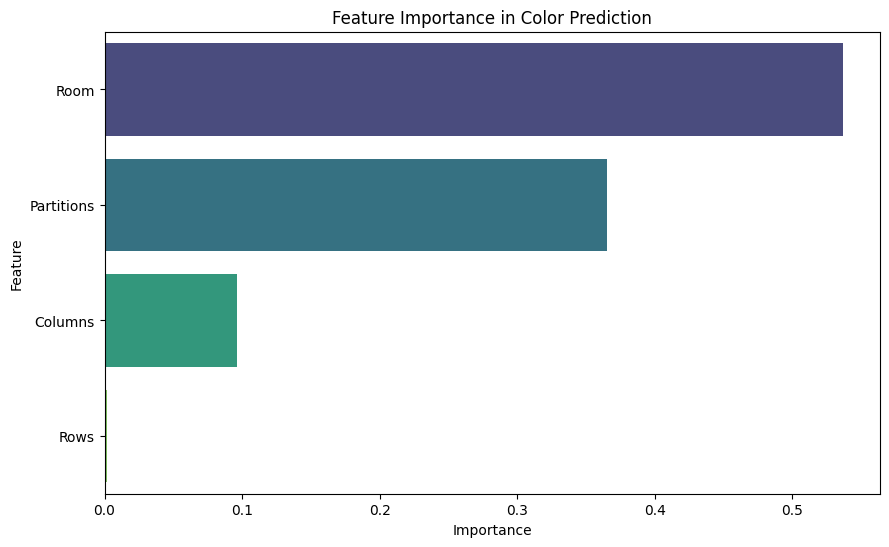

In [79]:

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Color Prediction')
plt.show()

## Pairplot to Visualize Feature Relationships

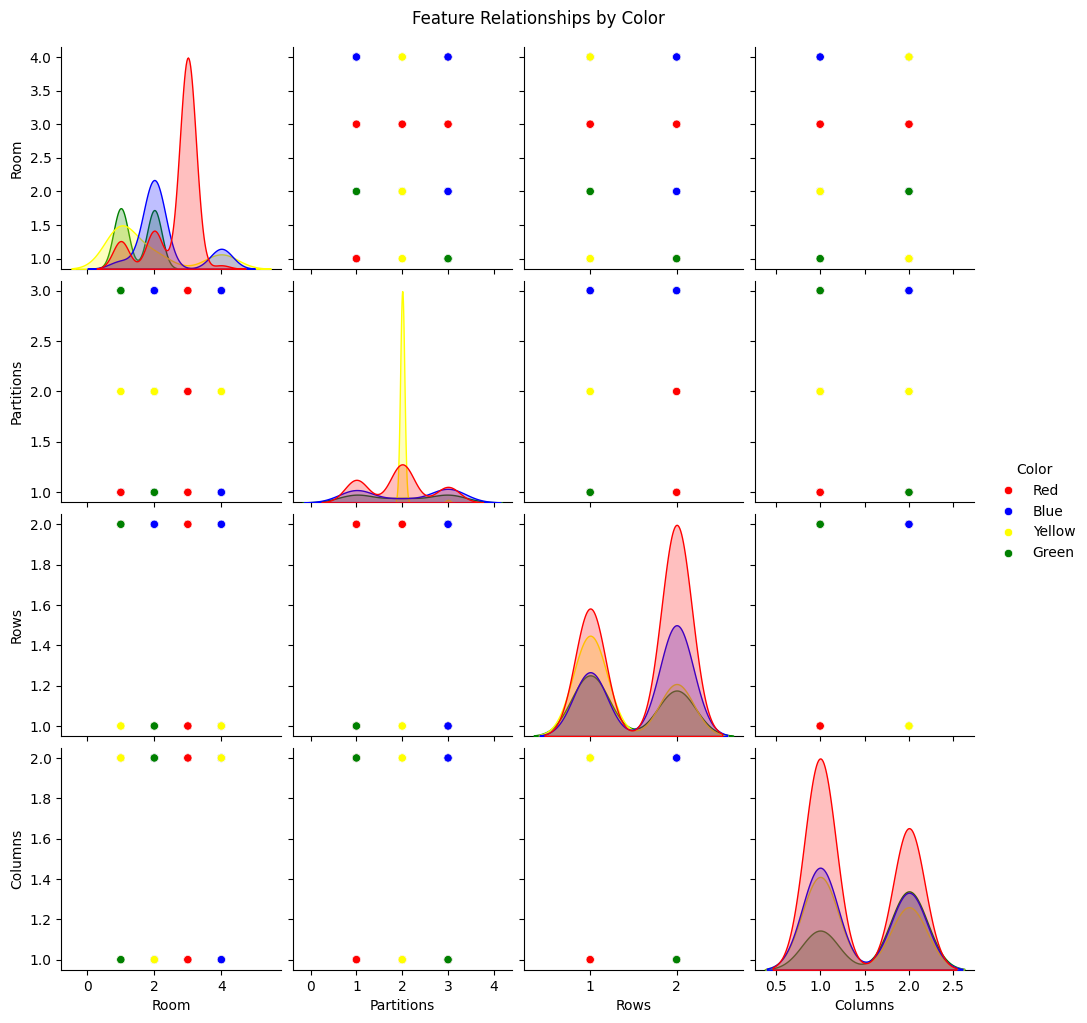

In [80]:
sns.pairplot(df, hue='Color', palette={'Red':'red', 'Blue':'blue', 'Yellow':'yellow', 'Green':'green'})
plt.suptitle("Feature Relationships by Color", y=1.02)
plt.show()

## Class Distribution by Column Value

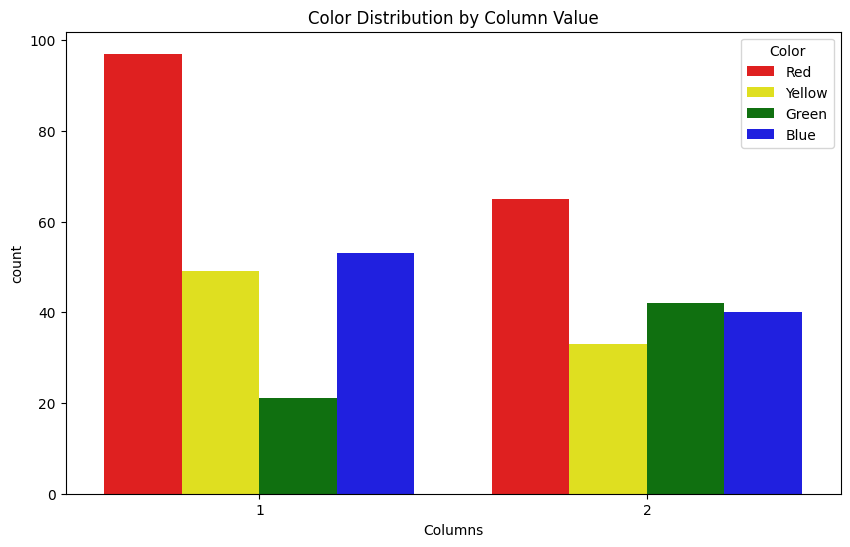

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Columns', hue='Color', palette={'Red':'red', 'Blue':'blue', 'Yellow':'yellow', 'Green':'green'}, color="light")
plt.title('Color Distribution by Column Value')
plt.show()

## Decision Tree Probability Visualization

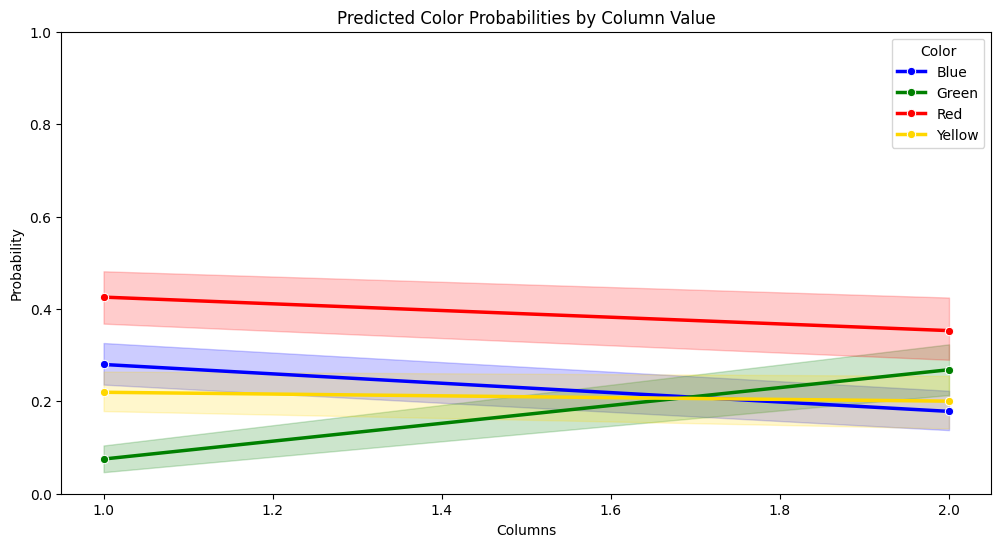

In [82]:

prob_df = pd.DataFrame(clf.predict_proba(X), columns=clf.classes_)
prob_df['Columns'] = df['Columns']

melted_prob = prob_df.melt(id_vars='Columns', var_name='Color', value_name='Probability')

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_prob, x='Columns', y='Probability', hue='Color', 
             palette={'Red':'red', 'Blue':'blue', 'Yellow':'gold', 'Green':'green'}, 
             marker='o', linewidth=2.5)
plt.title('Predicted Color Probabilities by Column Value')
plt.ylim(0, 1)
plt.show()

## Confusion Matrix Heatmap

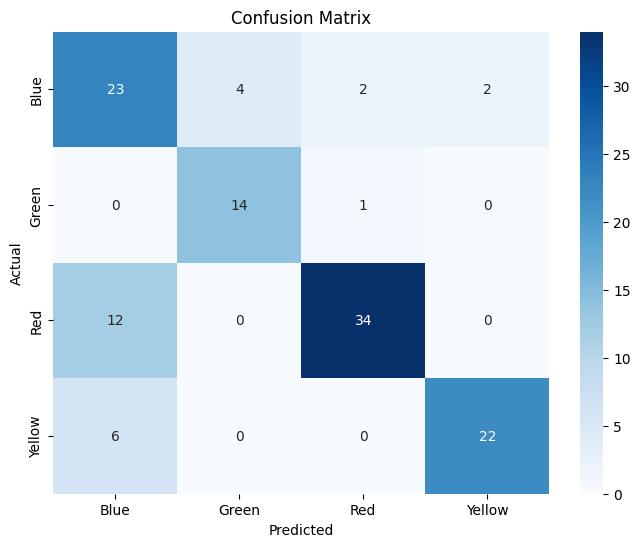

In [83]:

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Actual vs Predicted Comparison

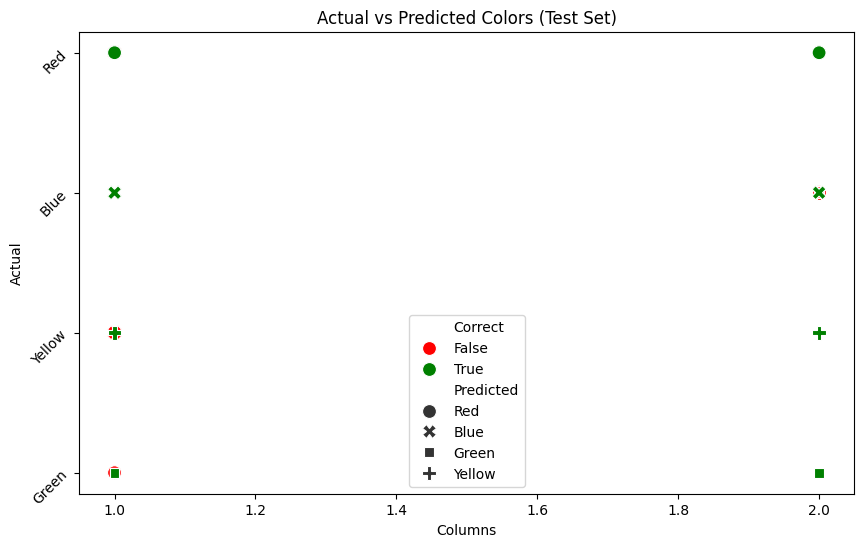

In [84]:
compare_df = X_test.copy()
compare_df['Actual'] = y_test
compare_df['Predicted'] = y_pred
compare_df['Correct'] = compare_df['Actual'] == compare_df['Predicted']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=compare_df, x='Columns', y='Actual', hue='Correct', 
               palette={True:'green', False:'red'}, style='Predicted', s=100)
plt.title('Actual vs Predicted Colors (Test Set)')
plt.yticks(rotation=45)
plt.show()

## Decision Tree Interpretation

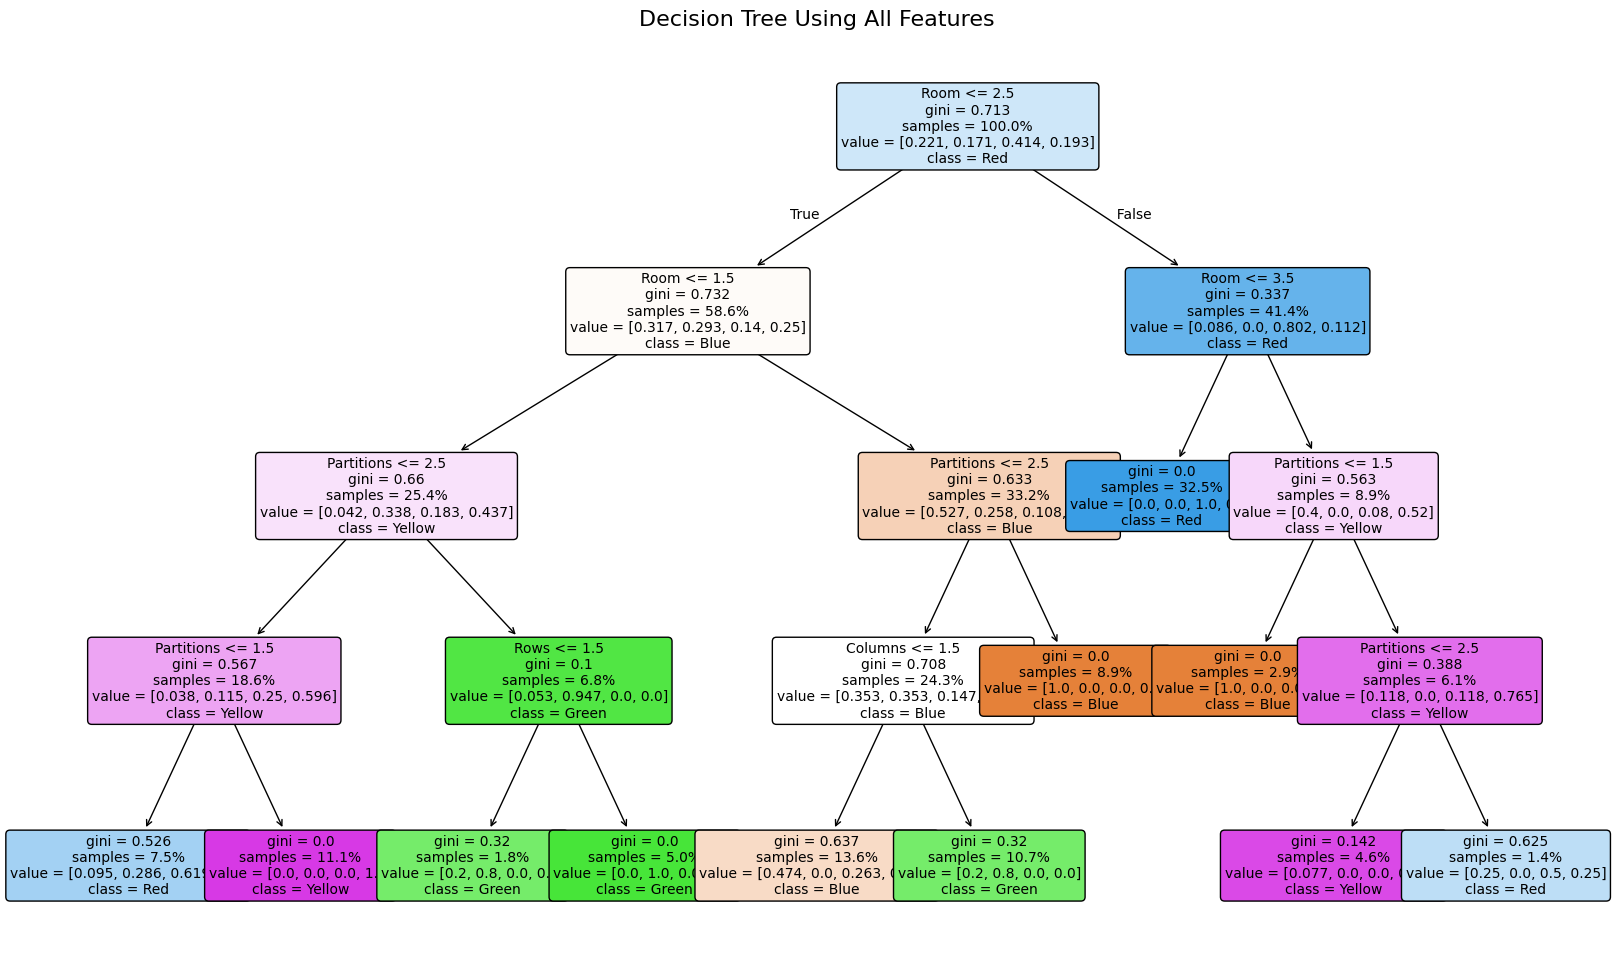

In [85]:
plt.figure(figsize=(20, 12))
plot_tree(clf, 
          feature_names=X.columns,
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title("Decision Tree Using All Features", fontsize=16)
plt.show()

## Predicition With new Values 

In [86]:
# Create widgets with styling
room_slider = IntSlider(
    min=0, max=10, step=1, 
    description='Room:', 
    style={'description_width': '80px'},
    layout=Layout(width='250px')
)

part_slider = IntSlider(
    min=1, max=5, step=1,
    description='Partitions:',
    style={'description_width': '80px'},
    layout=Layout(width='250px')
)

rows_slider = IntSlider(
    min=1, max=5, step=1,
    description='Rows:',
    style={'description_width': '80px'},
    layout=Layout(width='250px')
)

cols_slider = IntSlider(
    min=1, max=5, step=1,
    description='Columns:',
    style={'description_width': '80px'},
    layout=Layout(width='250px')
)

# Colorful predict button
predict_button = Button(
    description="Predict Color",
    button_style='primary',
    layout=Layout(width='150px', height='40px'),
    style={'font_weight': 'bold'}
)

# Output with color styling
output = Output(
    layout=Layout(
        border='1px solid gray',
        padding='10px',
        margin='10px 0',
        width='500px'
    )
)

# Color mapping for predictions
color_styles = {
    'Red': {'background-color': '#ffcccc', 'color': '#cc0000', 'icon': '🔴'},
    'Blue': {'background-color': '#cce0ff', 'color': '#0000cc', 'icon': '🔵'},
    'Yellow': {'background-color': '#fff2cc', 'color': '#cc9900', 'icon': '🟡'},
    'Green': {'background-color': '#ccffcc', 'color': '#006600', 'icon': '🟢'}
}

def on_predict_clicked(b):
    with output:
        output.clear_output()
        input_data = pd.DataFrame([[
            room_slider.value,
            part_slider.value,
            rows_slider.value,
            cols_slider.value
        ]], columns=['Room', 'Partitions', 'Rows', 'Columns'])
        
        prediction = clf.predict(input_data)[0]
        proba = clf.predict_proba(input_data)[0]
        proba_dict = dict(zip(clf.classes_, proba))
        
        # Get style for the predicted color
        style = color_styles.get(prediction, {})
        
        # Display prediction with color styling
        display(HTML(f"""
        <div style="
            background-color: {style.get('background-color', '#f0f0f0')};
            color: {style.get('color', '#000000')};
            padding: 15px;
            border-radius: 5px;
            font-size: 18px;
            font-weight: bold;
            text-align: center;
            margin: 10px 0;
        ">
            {style.get('icon', '🎯')} Predicted Color: {prediction}
        </div>
        """))
        
        # Display probabilities
        print("\nPrediction Probabilities:")
        for color, prob in proba_dict.items():
            style = color_styles.get(color, {})
            print(f"{style.get('icon', '')} {color}: {prob:.2%}")

predict_button.on_click(on_predict_clicked)

# Create responsive layout
ui = VBox([
    Label("Color Predictor Dashboard", 
          layout=Layout(justify_content='center'),
          style={'font_weight': 'bold', 'font_size': '16px'}),
    HBox([room_slider, part_slider], layout=Layout(justify_content='space-around')),
    HBox([rows_slider, cols_slider], layout=Layout(justify_content='space-around')),
    HBox([predict_button], layout=Layout(justify_content='center')),
    output
], layout=Layout(
    width='100%',
    padding='20px',
    border='1px solid #e0e0e0',
    border_radius='5px'
))

display(ui)